In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv(r"F:\DSA\Kaggle\supermarket_sales - Sheet1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


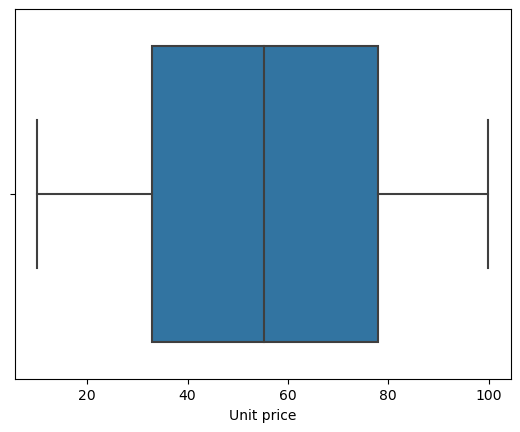

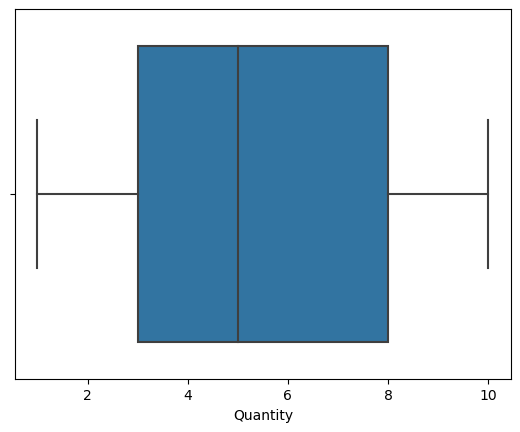

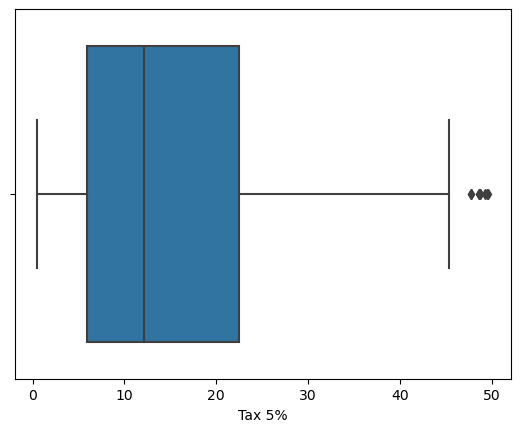

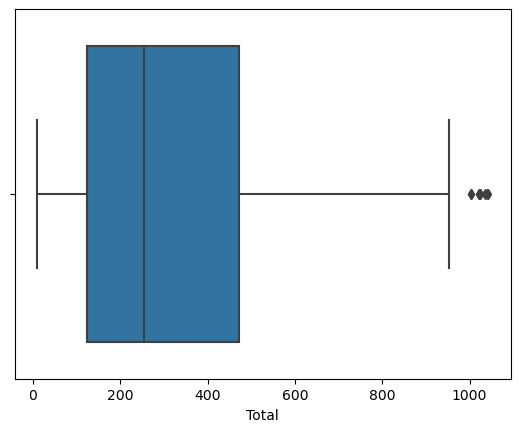

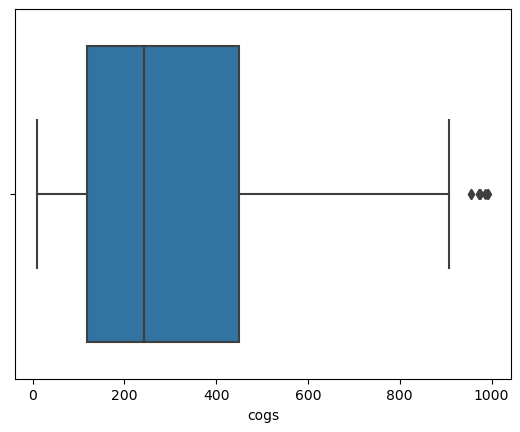

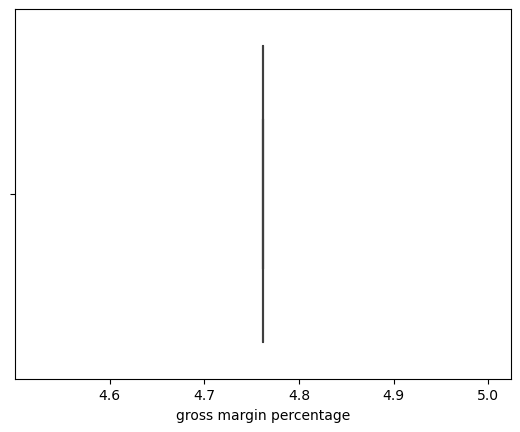

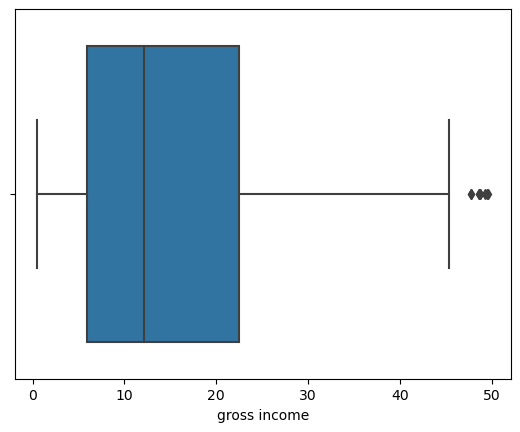

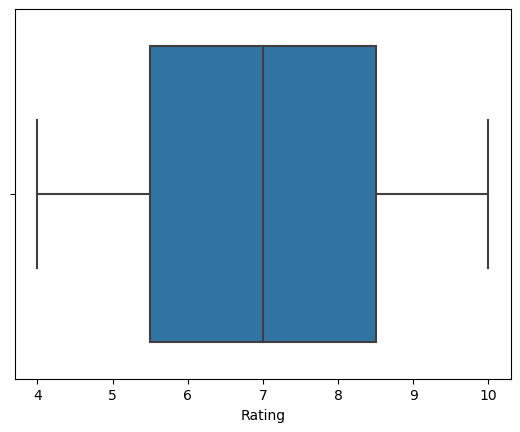

In [5]:
num_data = data.select_dtypes(include = ['int64', 'float64'])
for col in num_data.columns:
    sns.boxplot(x = data[col])
    plt.show()

In [31]:
def iqr_clipping(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data[col] = data[col].clip(lower = lower, upper = upper)
    return data[col]

for cols in num_data.columns:
    data[cols] = iqr_clipping(data, cols) 

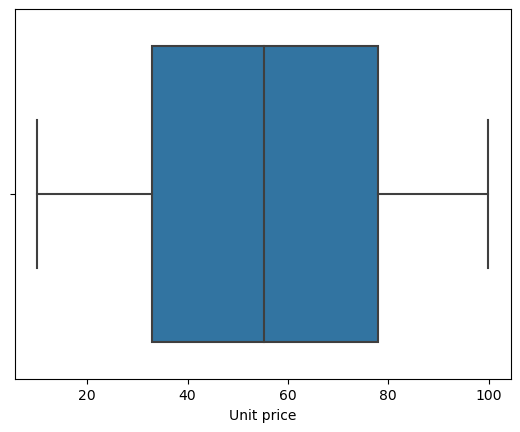

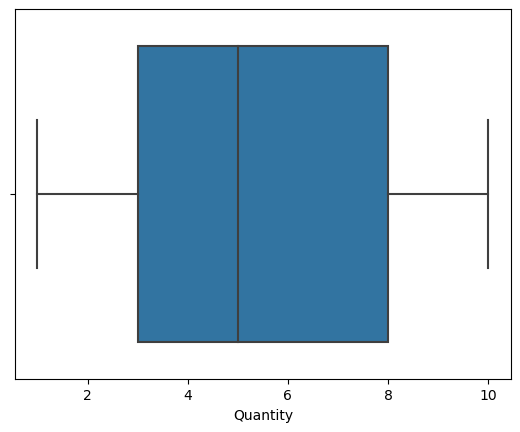

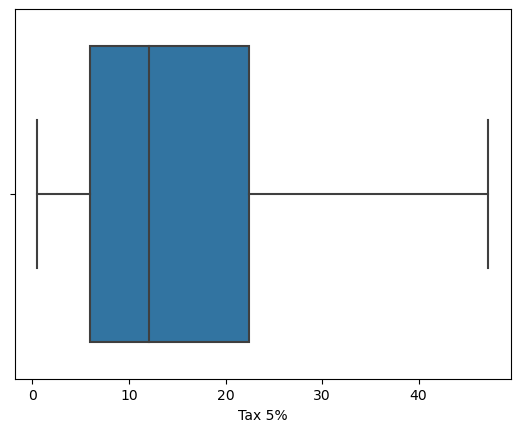

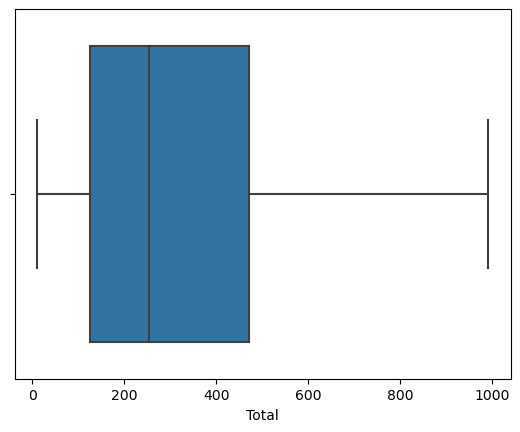

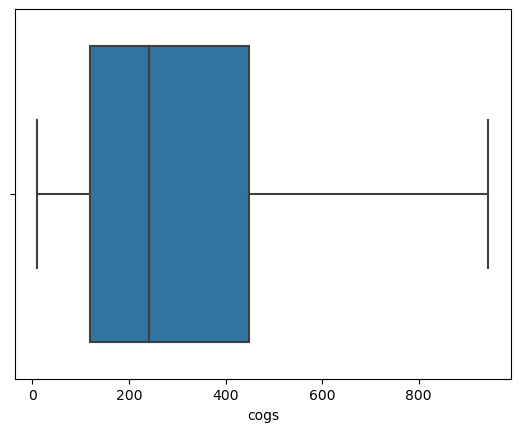

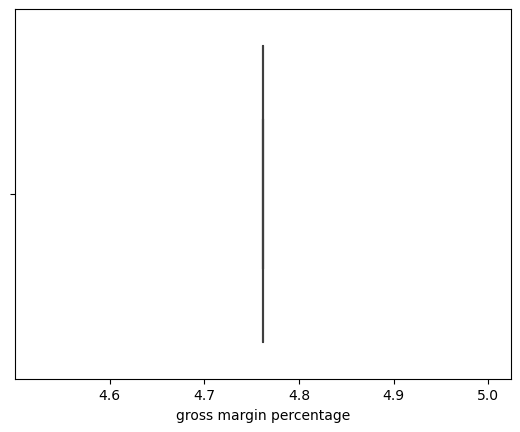

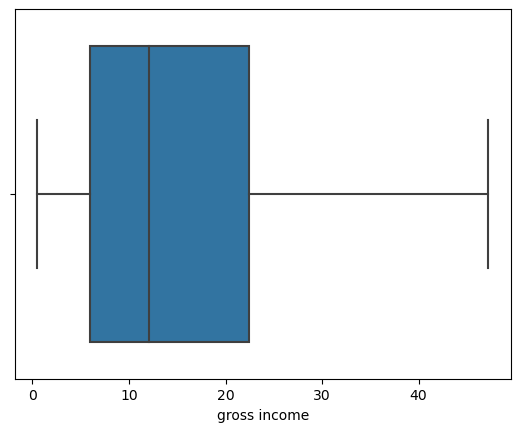

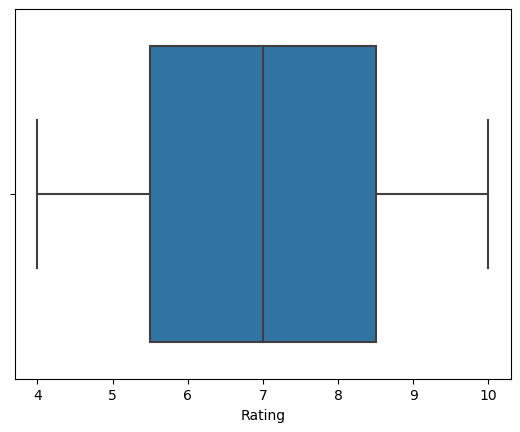

In [32]:
num_data = data.select_dtypes(include = ['int64', 'float64'])
for col in num_data.columns:
    sns.boxplot(x = data[col])
    plt.show()

In [6]:
data['gross margin percentage'].value_counts()

gross margin percentage
4.761905    1000
Name: count, dtype: int64

In [20]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [18]:
male_gi = data.loc[data['Gender'] == 'Male', 'gross income']

In [19]:
female_gi = data.loc[data['Gender'] == 'Female', 'gross income']

In [21]:
F, p = f_oneway(male_gi, female_gi)
print(F, p)

2.4464921507254607 0.11810484577140822


In [37]:
chi2, pval, d, e = chi2_contingency(male_gi.values, female_gi.values)
print(chi2, pval)

0.0 1.0


In [40]:
male_gi.sum()

7384.944

In [41]:
female_gi.sum()

7994.424999999999

In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [31]:
df = data.copy()
df = df.rename(columns={'gross income': 'gross_income', 'Customer type': 'Customer_type'})
model = ols('gross_income ~ Gender * Customer_type', data=df).fit()
anova_table2 = anova_lm(model)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,334.920796,334.920796,2.442462,0.118408
Customer_type,1.0,42.940053,42.940053,0.313147,0.575881
Gender:Customer_type,1.0,5.874422,5.874422,0.042840,0.836069
Residual,996.0,136575.762279,137.124259,NaN,NaN
